# Notebook for manipulating aberrations in ~ medium magnification images
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pycroscopy/DTMicroscope/blob/main/notebooks/STEM/3_stem_atom_finding_COLAB-Hackathon.ipynb)


### Theory by Gerd Duscher

### Notebook by Austin Houston

### Load libraries

In [28]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.9.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import sys
import os
%load_ext autoreload
%autoreload 2

if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    
    output.enable_custom_widget_manager()
    
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')
import pyTEMlib
from pyTEMlib import probe_tools
print('pyTEM version: ',pyTEMlib.__version__)

sys.path.insert(0, '/Users/austin/Documents/GitHub/DTMicroscope')
from DTMicroscope.base.stem import DTSTEM

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
pyTEM version:  0.2024.09.1


In [2]:
ip = "11.11.000.123"

# DTMicroscope
microscope = DTSTEM(data_mode = 'simulation') # choice of 'simulation' or 'preloaded'
microscope.connect(ip, port = 9095)


0.03
0.03
Connected to Digital Twin


In [3]:
# the initialized state of the aberrations (realistic to the Spectra300)
microscope.optics['fov'] = 110

probe_tools.print_aberrations(microscope.aberrations)

### Visualize the HAADF image with these aberrations

0.03
0.03


Text(0.5, 1.0, 'Simulated HAADF Image')

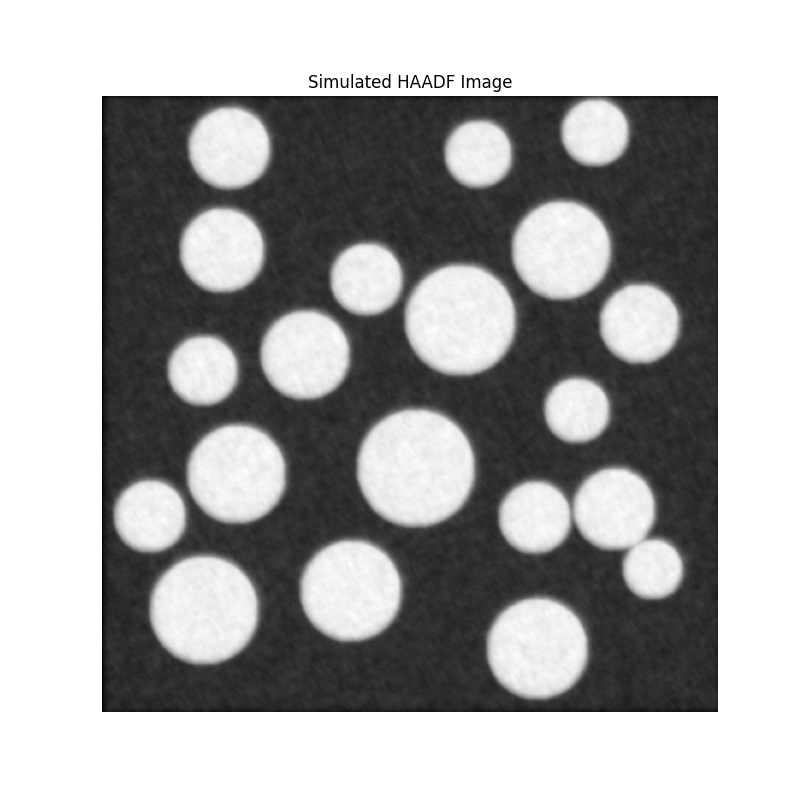

In [44]:
# This seed only applied to the circles, not the noise
image = microscope.get_scanned_image(size=512, dwell_time=10, detector='haadf', seed=42)

fig, ax = plt.subplots(1,1, figsize = (8,8))

ax.imshow(image, cmap = 'gray')
ax.axis('off')
ax.set_title('Simulated HAADF Image')

### Visualize the probe and Ronchigram for the current state of the microscope

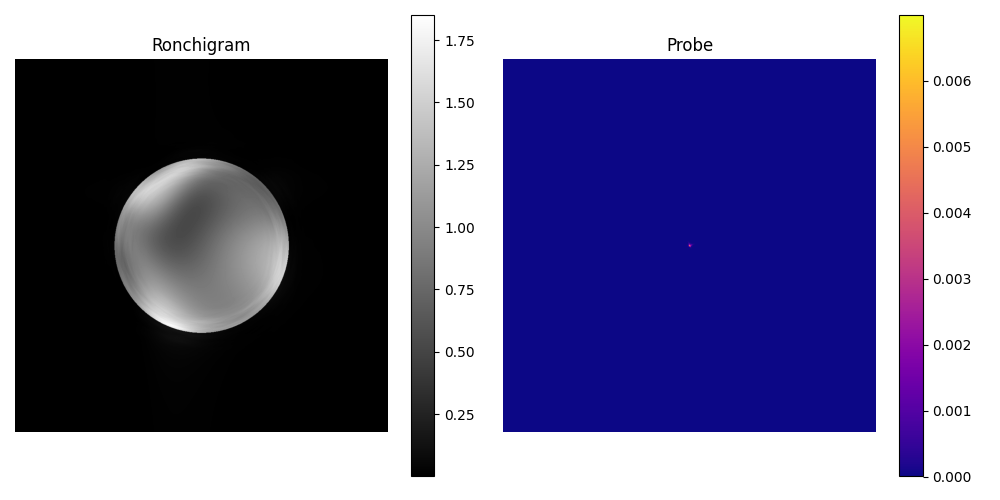

In [45]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

# View the Ronchigram
ax[0].set_title('Ronchigram')
ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray')
fig.colorbar(ax[0].imshow(microscope.aberrations['ronchigram'], cmap = 'gray'))

# View the Probe
ax[1].set_title('Probe')
ax[1].imshow(microscope.optics['probe'], cmap = 'gray')
fig.colorbar(ax[1].imshow(microscope.optics['probe'], cmap = 'plasma'))

for a in ax:
    a.axis('off')
fig.tight_layout()

let's define a metric to determine how 'good' the image is

In [46]:
def calculate_contrast(image):
    return (np.max(image))-np.min(image) / (np.max(image)+np.min(image))

### Grid search to find the best astig values

0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


Text(0, 0.5, 'C12b')

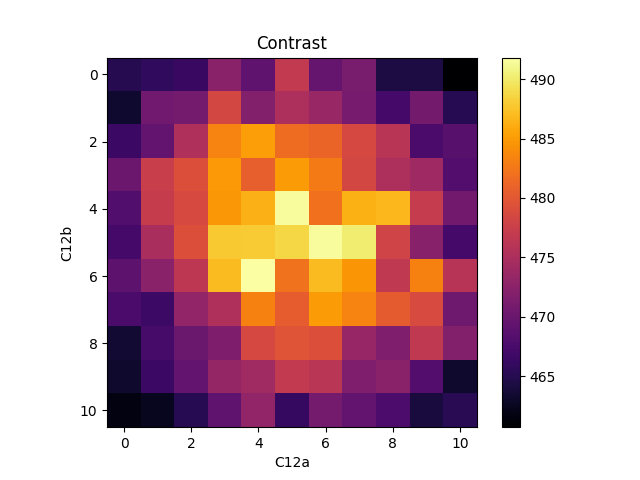

In [47]:
grid_density = 11

astig_array = np.linspace(-2,2,grid_density)

measured_contrast = np.zeros((grid_density,grid_density))
measured_images = np.zeros((grid_density,grid_density,512, 512))
measured_probes = np.zeros((grid_density,grid_density,1024, 1024))
measured_ronchi = np.zeros((grid_density,grid_density,1024, 1024))

for i,stig_a in enumerate(astig_array):
    for j, stig_b in enumerate(astig_array):
        # change stigmation
        microscope.aberrations['C12a'] = stig_a
        microscope.aberrations['C12b'] = stig_b

        # take images
        image = microscope.get_scanned_image(size=512, dwell_time=10, detector='haadf', seed=42)
        measured_contrast[i,j] = calculate_contrast(image)

        measured_images[i,j] = image
        measured_ronchi[i,j] = microscope.aberrations['ronchigram']
        measured_probes[i,j] = microscope.optics['probe']

plt.figure()
plt.imshow(measured_contrast, cmap = 'inferno')
plt.title('Contrast')
plt.colorbar()
plt.xlabel('C12a')
plt.ylabel('C12b')

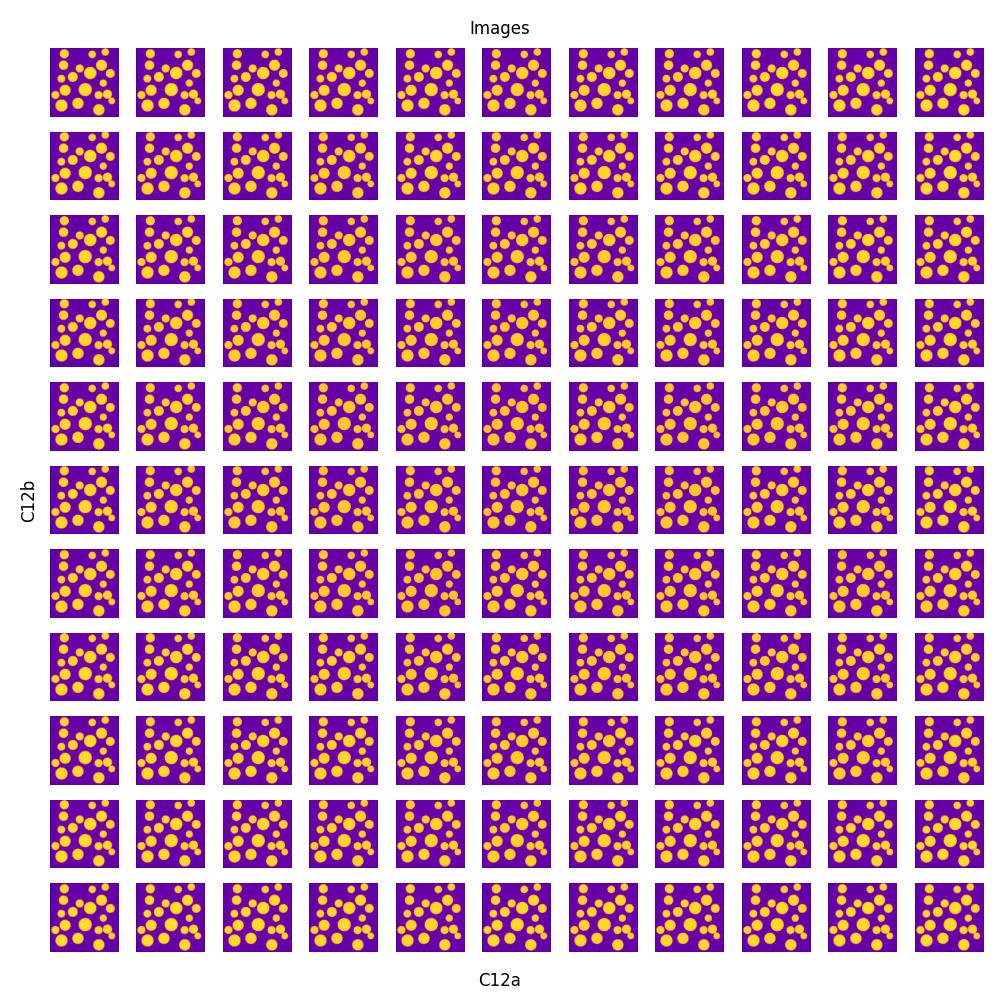

In [48]:
# plot a grid of the images
fig, ax = plt.subplots(grid_density,grid_density, figsize = (10,10), sharex=True, sharey=True)

for i in range(grid_density):
    for j in range(grid_density):
        ax[i,j].imshow(measured_images[i,j], cmap = 'plasma')
        ax[i,j].axis('off')
fig.supxlabel('C12a')
fig.supylabel('C12b')
fig.suptitle('Images')
fig.tight_layout()

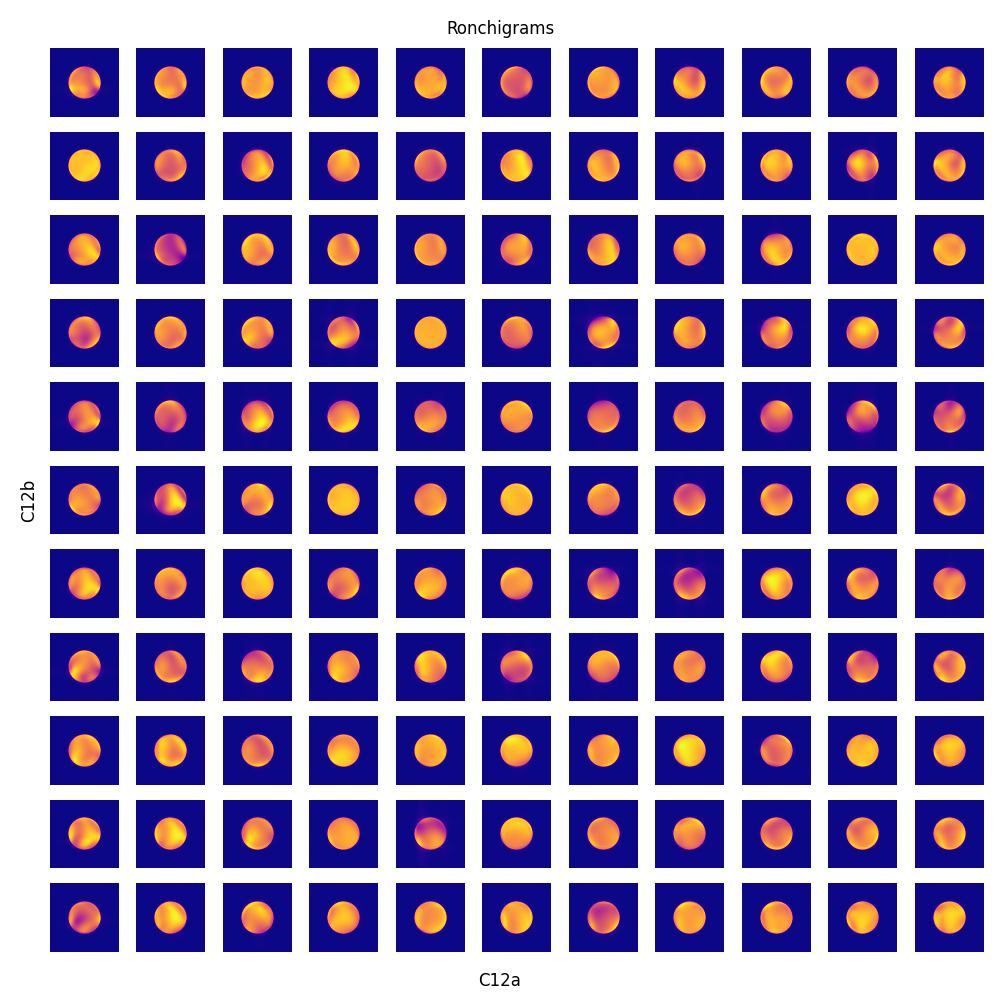

In [49]:
# plot a grid of the images
fig, ax = plt.subplots(grid_density,grid_density, figsize = (10,10), sharex=True, sharey=True)

for i in range(grid_density):
    for j in range(grid_density):
        ax[i,j].imshow(measured_ronchi[i,j], cmap = 'plasma')
        ax[i,j].axis('off')
fig.supxlabel('C12a')
fig.supylabel('C12b')
fig.suptitle('Ronchigrams')
fig.tight_layout()

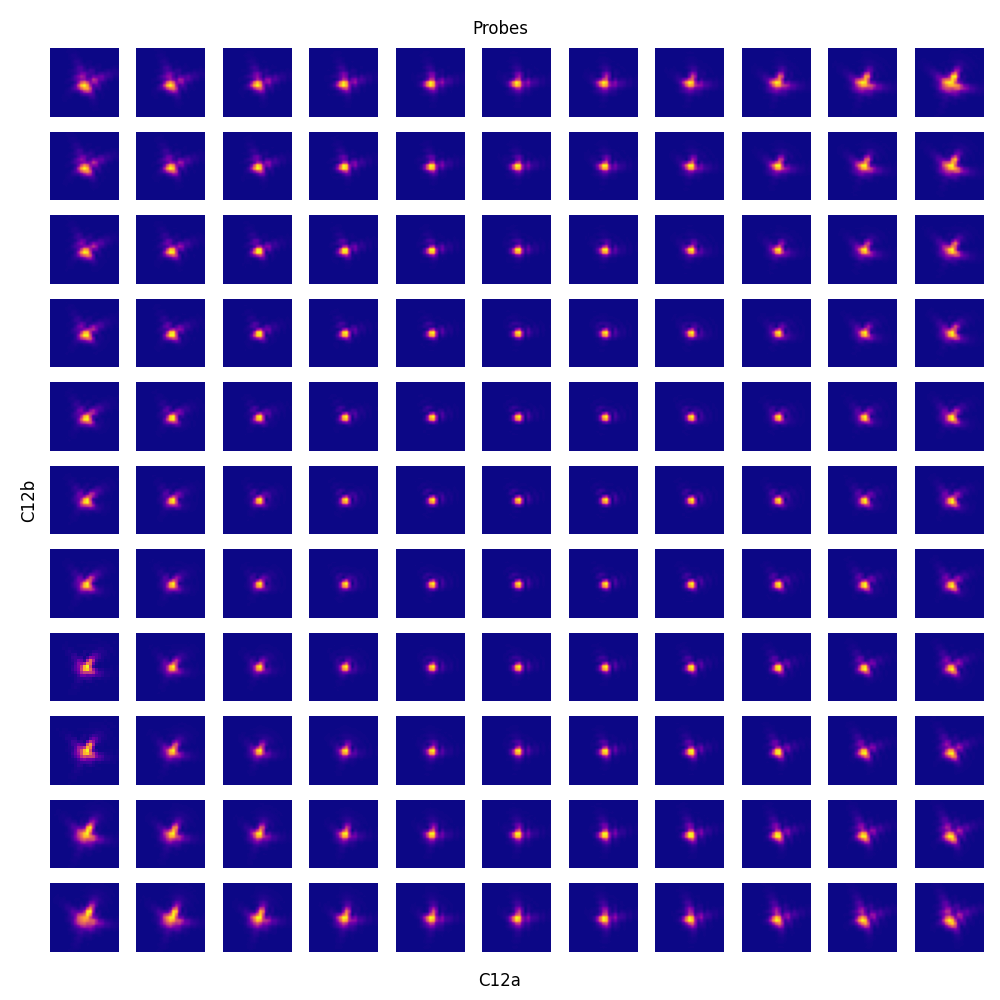

In [50]:
# plot a grid of the images
fig, ax = plt.subplots(grid_density,grid_density, figsize = (10,10), sharex=True, sharey=True)

for i in range(grid_density):
    for j in range(grid_density):
        ax[i,j].imshow(measured_probes[i,j,512-12:512+11,512-11:512+12], cmap = 'plasma')
        ax[i,j].axis('off')
fig.supxlabel('C12a')
fig.supylabel('C12b')
fig.suptitle('Probes')
fig.tight_layout()

We can visualize the relationship between the images, the ronchigrams, the probes, and the contrast - 

But experimentally, we only get information about the images.

try the same thing with a much lower exposure time
and random image seeds

we've defined a pretty robust measure already

0.03
0.03
0.03
0.03


/Users/austin/Documents/GitHub/DTMicroscope/DTMicroscope/base/stem.py:127: UserWarning: Could not fit any shapes to image, consider reducing the minimum dimension
  image, _ = random_shapes((size, size), min_shapes=20, max_shapes=35, shape='circle',


0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03
0.03


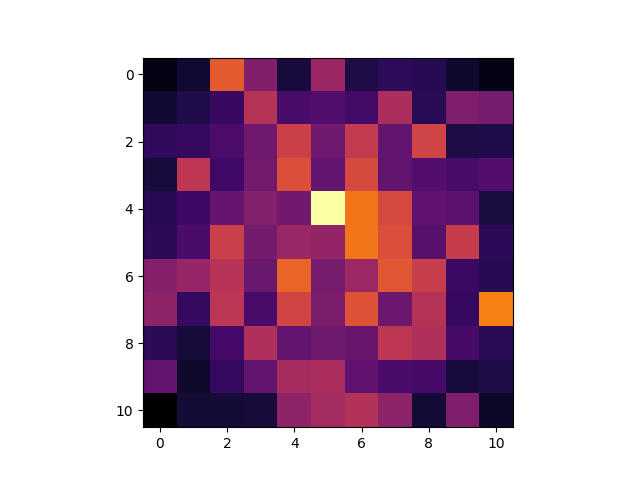

In [51]:
grid_density = 11

astig_array = np.linspace(-2,2,grid_density)

measured_contrast = np.zeros((grid_density,grid_density))
measured_images = np.zeros((grid_density,grid_density,512, 512))
measured_probes = np.zeros((grid_density,grid_density,1024, 1024))
measured_ronchi = np.zeros((grid_density,grid_density,1024, 1024))

for i,stig_a in enumerate(astig_array):
    for j, stig_b in enumerate(astig_array):
        # change stigmation
        microscope.aberrations['C12a'] = stig_a
        microscope.aberrations['C12b'] = stig_b

        # take images
        image = microscope.get_scanned_image(size=512, dwell_time=0.001, detector='haadf', seed=None)
        measured_contrast[i,j] = calculate_contrast(image)

        measured_images[i,j] = image
        measured_ronchi[i,j] = microscope.aberrations['ronchigram']
        measured_probes[i,j] = microscope.optics['probe']

plt.figure()
plt.imshow(measured_contrast, cmap = 'inferno')

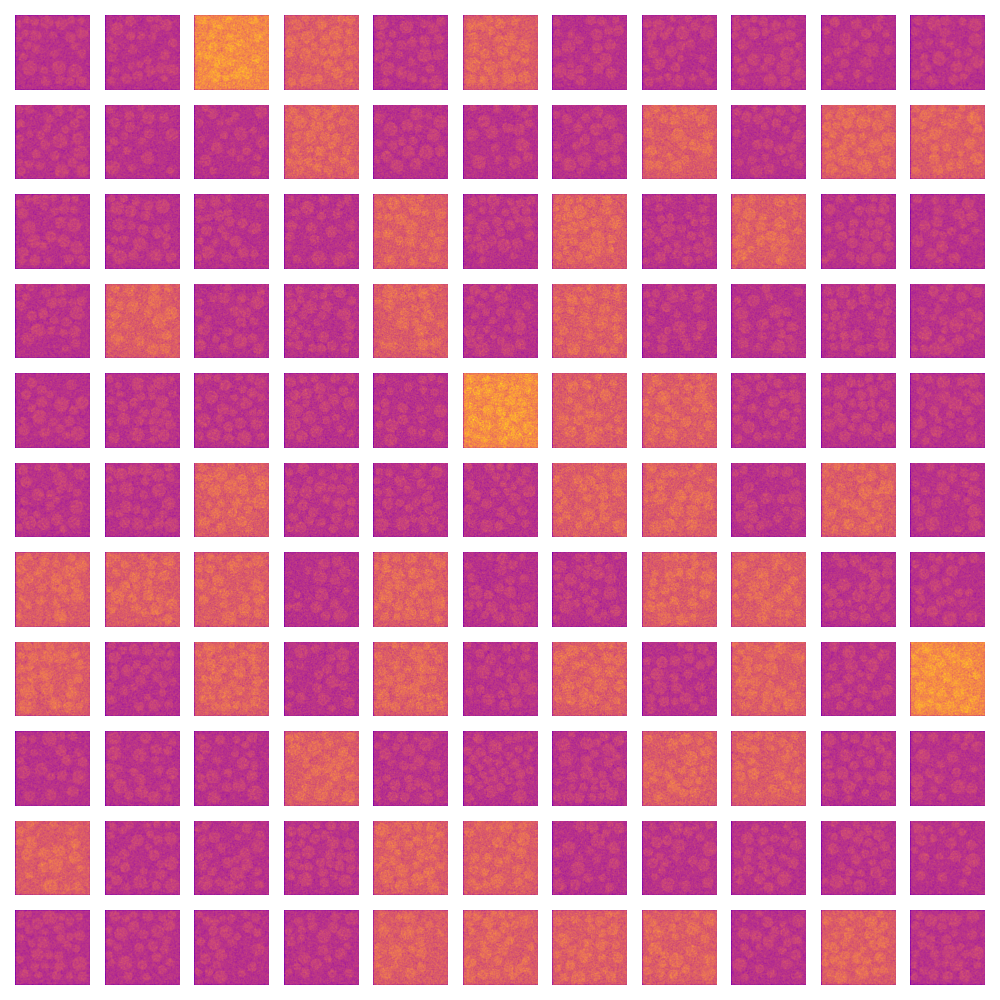

In [52]:
# plot a grid of the images
fig, ax = plt.subplots(grid_density,grid_density, figsize = (10,10), sharex=True, sharey=True)

for i in range(grid_density):
    for j in range(grid_density):
        ax[i,j].imshow(measured_images[i,j], cmap = 'plasma', vmin=0, vmax=0.6)
        ax[i,j].axis('off')
fig.tight_layout()


## Task 1:
### Keep reducing the dwell time until the contrast is no longer visible.

What is the minimum dwell time that you can detect a contrast change?

Come up with a new metric, and see how well it works

## Task 2:
### Look at the other aberrations

get a feel for their respective magnitudes

## Task 3:

### Solve for the aberrations without a grid search

Use any method you like

Hint: look how the aberrations affect overfocus and underfocus image series 